In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# let's drop the Id column
df.drop(['Id'], axis=1, inplace=True)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
sns.set_style('whitegrid')

#### Some Exploratory Data Analysis 

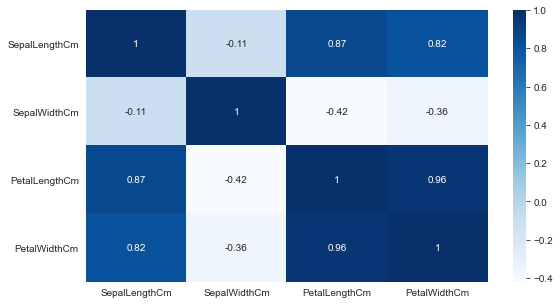

In [10]:
# let's check the correlation
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

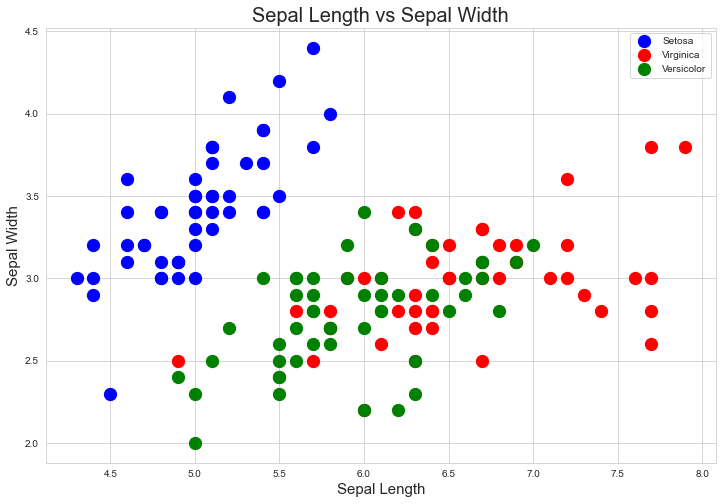

In [11]:
ax1 = df[df['Species']=='Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', s=150, label='Setosa', figsize=(12,8))
df[df['Species']=='Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='red', s=150, label='Virginica', ax=ax1)
df[df['Species']=='Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', s=150, label='Versicolor', ax=ax1)
ax1.set_xlabel('Sepal Length', size=15)
ax1.set_ylabel('Sepal Width', size=15)
ax1.set_title('Sepal Length vs Sepal Width', size=20)
plt.show()

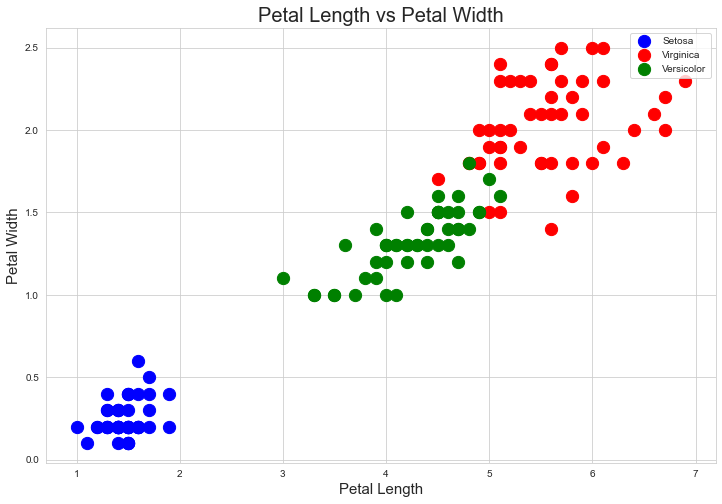

In [12]:
ax2 = df[df['Species']=='Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', s=150, label='Setosa', figsize=(12,8))
df[df['Species']=='Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='red', s=150, label='Virginica', ax=ax2)
df[df['Species']=='Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', s=150, label='Versicolor', ax=ax2)
ax2.set_xlabel('Petal Length', size=15)
ax2.set_ylabel('Petal Width', size=15)
ax2.set_title('Petal Length vs Petal Width', size=20)
plt.show()

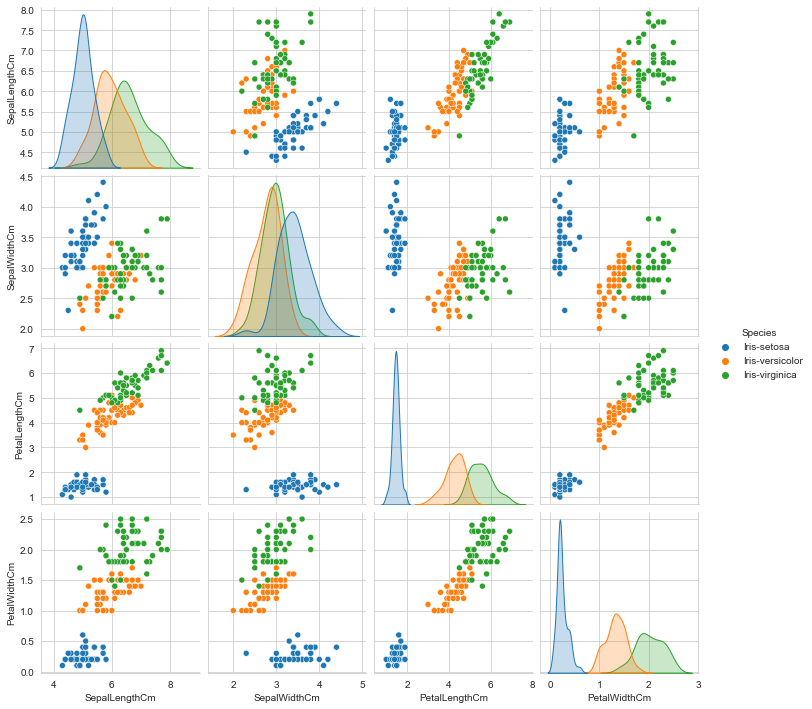

In [13]:
sns.pairplot(df, hue='Species')
plt.show()

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now let's select sepal length, sepal width, petal length, and petal width columns of the dataset in a variable called X so that we can train our model with these features.

In [15]:
X = df.drop('Species', axis=1).values

### MinMaxScaler

In [16]:
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster center.

In [17]:
sum_of_squared_distance = []

for k in range(1, 12):
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_of_squared_distance.append(km.inertia_)

As k increases, the sum of squared distance tends to zero.

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

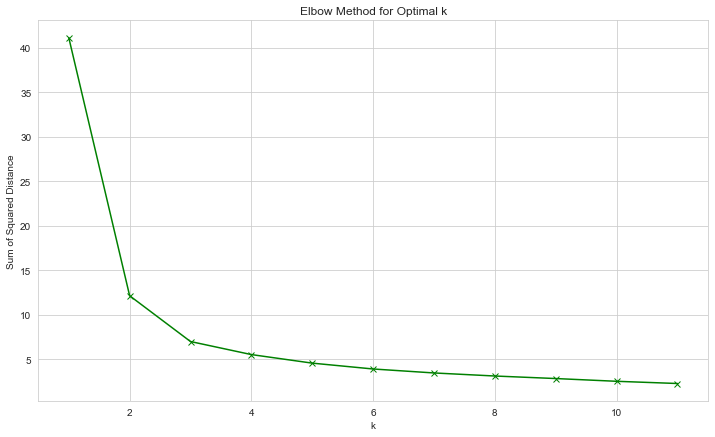

In [18]:
plt.figure(figsize=(12,7))
plt.plot(range(1,12), sum_of_squared_distance, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distance')
plt.title('Elbow Method for Optimal k')
plt.show()

#### In the plot above the elbow is at k=3 indicating the optimal k for this dataset is 3.

In [19]:
kmean = KMeans(n_clusters=3)
predict = kmean.fit_predict(X)

In [20]:
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [21]:
kmean.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

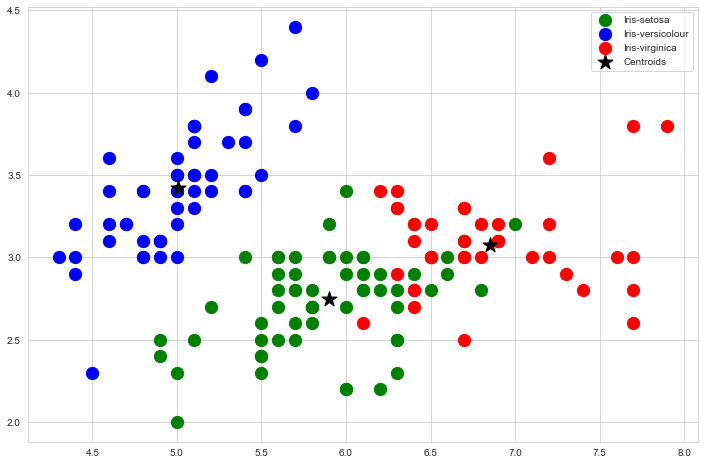

In [25]:
plt.figure(figsize=(12, 8))
plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s=150, c='g', label='Iris-setosa')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s=150, c='b', label='Iris-versicolour')
plt.scatter(X[predict == 2, 0], X[predict == 2, 1], s=150, c='r', label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s=250, marker='*', c ='black', label='Centroids')
plt.legend()
plt.show()

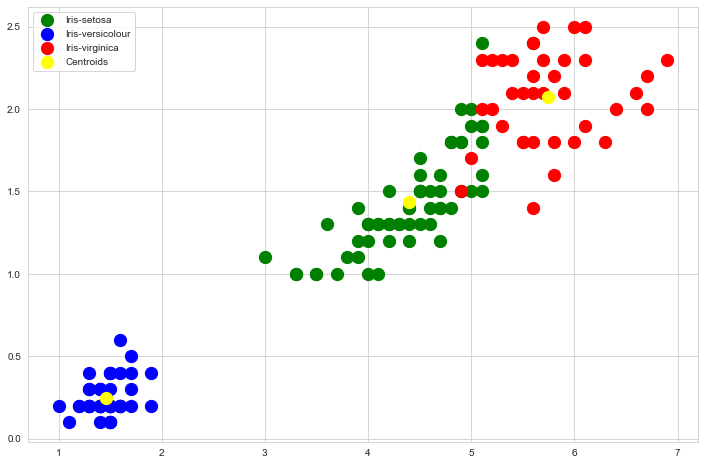

In [26]:
plt.figure(figsize=(12, 8))
plt.scatter(X[predict == 0, 2], X[predict == 0, 3], s=150, c='g', label='Iris-setosa')
plt.scatter(X[predict == 1, 2], X[predict == 1, 3], s=150, c='b', label='Iris-versicolour')
plt.scatter(X[predict == 2, 2], X[predict == 2, 3], s=150, c='r', label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmean.cluster_centers_[:, 2], kmean.cluster_centers_[:, 3], s=150, c='yellow', label='Centroids')
plt.legend()
plt.show()

In [27]:
kmean.inertia_

78.94084142614601

In [29]:
kmean.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
df.head()

In [ ]:
# df['num'] = pd.Categorical(df['Species'])

In [ ]:
# df['num'] = df['num'].cat.codes